In [20]:
import pandas as pd
# from osrs_api import GrandExchange, Item
# import osrs_api as osrs
import osrs_api_w_graph as osrs2
from osrs_api_w_graph import GrandExchange, Item
import time
pd.set_option('display.max_rows', 500)
from datetime import datetime as dt
from matplotlib import pyplot as plt

In [254]:
flip_dict = {'rings':{
                 'input':['sapphire ring',
                          'cosmic rune', 
                          'water rune'],
                 'output':['ring of recoil']
                    },
             'arrows':{
                 'input':['feather',
                          'arrow shaft'],
                 'output':['headless arrow']
                 }
            }

In [255]:
# turn all 'items' into dictionaries so we can store easier access to graphs, data, etc
for money_maker,vals in flip_dict.items():
    for k in vals:
        flip_dict[money_maker][k] = dict.fromkeys(flip_dict[money_maker][k],dict())
        for m in flip_dict[money_maker][k]:   
            print(m)
            print('\tRetrieving item data')
            item_id = Item.get_ids(m)
            print('\tRetrieving item info')
            item_info = GrandExchange.item(item_id)
            print('\tRetrieving graph data')
            graph_data = item_info.price_info.graph
            print('\tCreating graph dataframe')
            graph_df = pd.DataFrame(graph_data).T.reset_index()
            graph_df.columns = ['timestamp','daily','average']
            graph_df['date'] = inf_df['timestamp'].apply(lambda x: dt.fromtimestamp(int(x)/1000).date())
            
            
            flip_dict[money_maker][k][m] = {'item':item_id,
                                            'info':item_info,
                                            'graph_data':graph_data,
                                            'graph_df':graph_df}
            
        flip_dict[money_maker][k]['total_df'] = pd.DataFrame()
print('Dictionary filled')

sapphire ring
	Retrieving item data
	Retrieving item info
	Retrieving graph data
	Creating graph dataframe
cosmic rune
	Retrieving item data
	Retrieving item info
	Retrieving graph data
	Creating graph dataframe
water rune
	Retrieving item data
	Retrieving item info
	Retrieving graph data
	Creating graph dataframe
ring of recoil
	Retrieving item data
	Retrieving item info
	Retrieving graph data
	Creating graph dataframe
feather
	Retrieving item data
	Retrieving item info
	Retrieving graph data
	Creating graph dataframe
arrow shaft
	Retrieving item data
	Retrieving item info
	Retrieving graph data
	Creating graph dataframe
headless arrow
	Retrieving item data
	Retrieving item info
	Retrieving graph data
	Creating graph dataframe
Dictionary filled


In [226]:
use_df = flip_dict['rings']['input']

item1 = use_df['sapphire ring']['graph_df']
item2 = use_df['cosmic rune']['graph_df']
item3 = use_df['water rune']['graph_df']

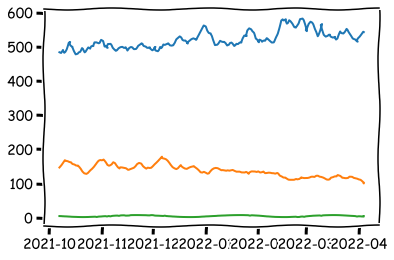

In [220]:
for x in flip_dict['rings']['input'].keys():
    plt.plot('date','daily',data=flip_dict['rings']['input'][x]['graph_df'])

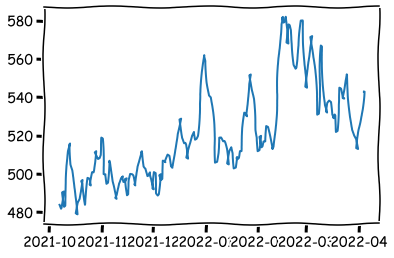

In [66]:
for df in [inf_df]:
    plt.plot('date','daily',data=df)

